In [97]:
!pip3 install cassandra-driver

In [96]:
import cassandra 
print (cassandra.__version__)

3.25.0


In [153]:
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider

cloud_config= {
        'secure_connect_bundle': r'C:\Users\pvenugo\Downloads\secure-connect-cass-db-1.zip'
}
auth_provider = PlainTextAuthProvider('fpilcORPLMJUuMXdJJNIbSNe', 'E,Ojkwi7WjJJFa5E3ZhOC45NLn9m7OU3qqkrNyE2,YdrW3bkRdAeclPuxIjaEk6uf9nz8vaWag,aqjDUa+6SCGKmUSeLT00fiZI-gdY6EPFjTJMrDSx9+GCd-HjNpbqY')
cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)
session = cluster.connect()
#session.execute("create keyspace mykeyspace with replication={'class': 'SimpleStrategy', 'replication_factor' : 3};").one()
row = session.execute("select release_version from system.local").one()
if row:
    print(row[0])
else:
    print("An error occurred.")

4.0.0.6813


Query 1 : Creating table in Keyspace

In [53]:
query_1 = 'create table data_ex_1.empdata(Emp_ID int PRIMARY KEY , First_Name text, Last_Name text, Dept_No int, Dept_Name text);'
session.execute(query_1).one()
print(row)

Row(release_version='4.0.0.6811')


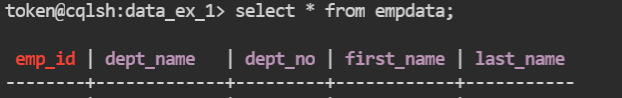

Query 2 : Inserting single data in Keyspace

In [ ]:
session=cluster.connect('data_ex_1')
query_2= "insert into empdata (Emp_ID,First_Name,Last_Name,Dept_No,Dept_Name) values (100 , 'Jack' , 'Jones' , 1200 , 'Accounts')"
session.execute(query_2)

In [ ]:
query_2_1= "insert into empdata (Emp_ID,First_Name,Last_Name,Dept_No,Dept_Name) values (298 , 'Sunder' , 'Kumar' , 2255 , 'Verfication')"
session.execute(query_2_1).one()

Query 3: Drop table 

In [46]:
session=cluster.connect('data_ex_1')
query_2_2="drop table empdata"

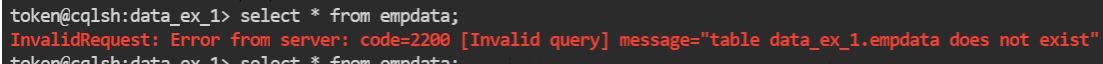

Query 3 : Insert data using import into the table

In [109]:
from Emp_List import Emps
session=cluster.connect('data_ex_1')
print(Emps)
for i in Emps:
    query_3="insert into empdata (Emp_ID,First_Name,Last_Name,Dept_No,Dept_Name) values (%s , %s , %s , %s , %s)" 
    session.execute(query_3, i)
print(row)

[(100, 'Jack', 'Jones', 1200, 'Accounts'), (333, 'Sneha', 'Singh', 4399, 'Validation'), (393, 'Balan', 'N', 8769, 'Silicon'), (976, 'Sneha', 'Warrier', 8907, 'IT'), (8633, 'Praveen', 'Kumar', 2345, 'Support'), (908, 'Dhina', 'Roy', 3452, 'Apps'), (187, 'Nimah', 'Tenv', 3245, 'Sales'), (2309, 'Jamie', 'Yen', 8906, 'Factory'), (298, 'Sunder', 'Kumar', 2255, 'Verfication')]
Row(emp_id=8633, dept_name='Support', dept_no=2345, first_name='Praveen', last_name='Kumar')


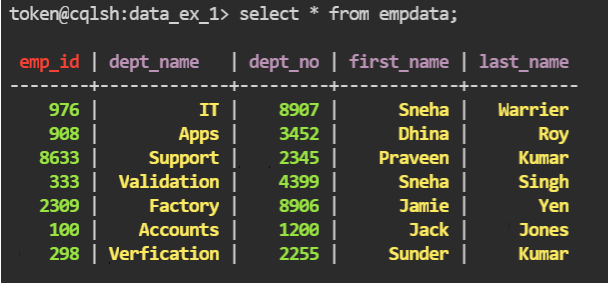

Query 4: Read the table 

In [11]:
session=cluster.connect('data_ex_1')
query_4="select * from empdata where Emp_ID=976"
x=session.execute(query_4)
for row in x:
    print(row)

Row(emp_id=976, dept_name='IT', dept_no=8907, first_name='Sneha', last_name='Warrier')


In [125]:
# id = '8633'
# query_5="select * from empdata where Emp_ID=%s",id
# session.execute(query_5)

Query 4 : Checking Schemas in Keyspaces

In [26]:
query_6="select * from system_schema.keyspaces"
x=session.execute(query_6)
for row in x:
    print(row)

Row(keyspace_name='system_auth', durable_writes=True, graph_engine=None, replication=OrderedMapSerializedKey([('asia-south1', '3'), ('class', 'org.apache.cassandra.locator.NetworkTopologyStrategy')]))
Row(keyspace_name='system_schema', durable_writes=False, graph_engine=None, replication=OrderedMapSerializedKey([('class', 'org.apache.cassandra.locator.LocalStrategy')]))
Row(keyspace_name='data_endpoint_auth', durable_writes=True, graph_engine=None, replication=OrderedMapSerializedKey([('asia-south1', '3'), ('class', 'org.apache.cassandra.locator.NetworkTopologyStrategy')]))
Row(keyspace_name='data_ex_1', durable_writes=True, graph_engine=None, replication=OrderedMapSerializedKey([('asia-south1', '3'), ('class', 'org.apache.cassandra.locator.NetworkTopologyStrategy')]))
Row(keyspace_name='system', durable_writes=False, graph_engine=None, replication=OrderedMapSerializedKey([('class', 'org.apache.cassandra.locator.LocalStrategy')]))
Row(keyspace_name='system_traces', durable_writes=True,

Query 5: Simple updating the table element 

In [32]:
query5 = "UPDATE data_ex_1.empdata SET first_name = 'Amy' where emp_id = 100"
x=session.execute(query5)
print(x)

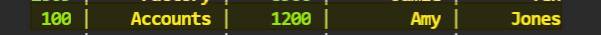

Query 6:Updating Table column type 

In [46]:
query6 = """
        Begin Batch
        insert into data_ex_1.empdata (first_name, last_name,emp_id,Dept_name) VALUES ('Veera', 'K',12111,'software') if not exist
        update data_ex_1.empdata SET Dept_no = 9660 , Last_name = 'Kim' WHERE emp_id = 12111 
        Apply Batch"""
x=session.execute(query6)
print(row)

Row(release_version='4.0.0.6813')


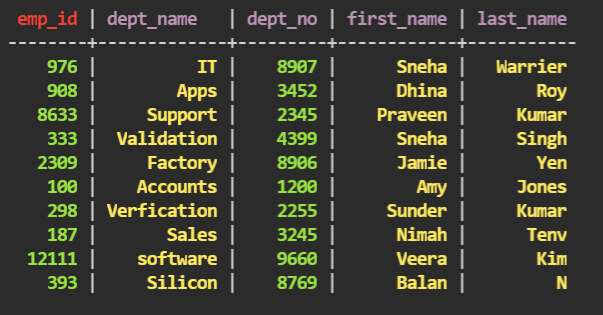

Retrieval and sorting queries

Query 7: Query to display complete table

In [55]:
q1='select * from data_ex_1.empdata'
x=session.execute(q1)
for row in x:
    print(row)

Row(emp_id=976, dept_name='IT', dept_no=8907, first_name='Sneha', last_name='Warrier')
Row(emp_id=908, dept_name='Apps', dept_no=3452, first_name='Dhina', last_name='Roy')
Row(emp_id=8633, dept_name='Support', dept_no=2345, first_name='Praveen', last_name='Kumar')
Row(emp_id=333, dept_name='Validation', dept_no=4399, first_name='Sneha', last_name='Singh')
Row(emp_id=2309, dept_name='Factory', dept_no=8906, first_name='Jamie', last_name='Yen')
Row(emp_id=100, dept_name='Accounts', dept_no=4329, first_name='Amy', last_name='Jones')
Row(emp_id=298, dept_name='Verfication', dept_no=2255, first_name='Sunder', last_name='Kumar')
Row(emp_id=187, dept_name='Sales', dept_no=3245, first_name='Nimah', last_name='Tenv')
Row(emp_id=12111, dept_name='software', dept_no=9660, first_name='Veera', last_name='Kim')
Row(emp_id=393, dept_name='Silicon', dept_no=8769, first_name='Balan', last_name='N')


Query 8: To display selective columns in the table

In [65]:
q2='select dept_name, first_name from data_ex_1.empdata'
x=session.execute(q2)
for row in x:
    print(row)

Row(dept_name='IT', first_name='Sneha')
Row(dept_name='Apps', first_name='Dhina')
Row(dept_name='Support', first_name='Praveen')
Row(dept_name='Validation', first_name='Sneha')
Row(dept_name='Factory', first_name='Jamie')
Row(dept_name='Accounts', first_name='Amy')
Row(dept_name='Verfication', first_name='Sunder')
Row(dept_name='Sales', first_name='Nimah')
Row(dept_name='software', first_name='Veera')
Row(dept_name='Silicon', first_name='Balan')


Query 9: To limit the table row/coulmn display

In [67]:
q3='select first_name from data_ex_1.empdata limit 2'
x=session.execute(q3)
for row in x:
    print(row)


Row(first_name='Sneha')
Row(first_name='Dhina')


Query 10: Create new table with UUID using now() for random ID generation ; Multiple partition keys in cluster

In [ ]:
q4 = 'create table mycs123.cycling( category text, points int, id UUID,lastname text, PRIMARY KEY (category, points) )'
session.execute(q4)

q4a = """
        Begin Batch
        insert into mycs123.cycling (category, points, id ,lastname ) VALUES ('Sprint',80,now(),'Alex') if not exists
        insert into mycs123.cycling (category, points, id ,lastname ) VALUES ('Sprint',87,now(),'Indra') if not exists
        insert into mycs123.cycling (category, points, id ,lastname ) VALUES ('GC',86,now(),'Arav') if not exists
        insert into mycs123.cycling (category, points, id ,lastname ) VALUES ('GC',98,now(),'Zen') if not exists
        Apply Batch"""
x=session.execute(q4a)
print(x)


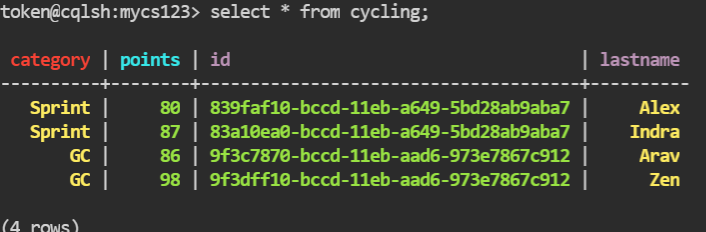

Query 11: Listing data by Order clause ; Partition Key with ASC/DESC order

In [93]:
q5="select * from mycs123.cycling WHERE category = 'GC' ORDER BY points ASC"
x=session.execute(q5)
for row in x:
    print(row)

Row(category='GC', points=86, id=UUID('9f3c7870-bccd-11eb-aad6-973e7867c912'), lastname='Arav')
Row(category='GC', points=98, id=UUID('9f3dff10-bccd-11eb-aad6-973e7867c912'), lastname='Zen')


Query 12: Deleting an element from row in the table

In [100]:
q6="Delete Dept_name from data_ex_1.empdata where emp_id =976"
x=session.execute(q6)
for row in x:
    print(row)

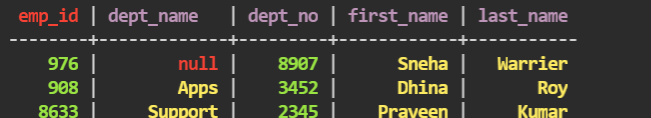

In [102]:
q7="select first_name, emp_id, dept_name from data_ex_1.empdata where emp_id =976" 
x=session.execute(q7)
for row in x:
    print(row)

Row(first_name='Sneha', emp_id=976, dept_name=None)


Query 13: Insert JSON data into a table

In [124]:
q8 = """insert into data_ex_1.empdata JSON '{
        "first_name": "Afrim",
        "last_name" : "James",
        "emp_id" : 7775,
        "Dept_name" : "Hardware",
        "Dept_no" : 8000
        }'
        """
x=session.execute(q8)
q8a="select * from data_ex_1.empdata where emp_id =7775" 
y=session.execute(q8a)
for row in y:
    print(row)

Row(emp_id=7775, dept_name='Hardware', dept_no=8000, first_name='Afrim', last_name='James')


In [111]:
q9=  """INSERT INTO mycs123.cycling JSON '{
  "category" : "Sprint", 
  "points" : 700, 
  "id" : "829aa84a-4bba-411f-a4fb-38167a987cda"
}'
"""
x=session.execute(q9)
print(x)

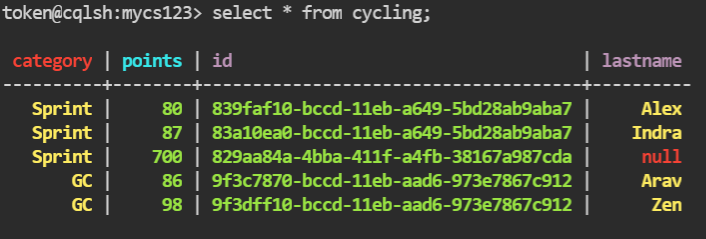

Query 13: Retrieve JSON format data from table

In [130]:
q10= "select json emp_id, first_name, Dept_name from data_ex_1.empdata "
y=session.execute(q10)
for row in y:
    print(row)

Row(json='{"emp_id": 976, "first_name": "Sneha", "dept_name": null}')
Row(json='{"emp_id": 908, "first_name": "Dhina", "dept_name": "Apps"}')
Row(json='{"emp_id": 8633, "first_name": "Praveen", "dept_name": "Support"}')
Row(json='{"emp_id": 333, "first_name": "Sneha", "dept_name": "Validation"}')
Row(json='{"emp_id": 2309, "first_name": "Jamie", "dept_name": "Factory"}')
Row(json='{"emp_id": 100, "first_name": "Amy", "dept_name": "Accounts"}')
Row(json='{"emp_id": 298, "first_name": "Sunder", "dept_name": "Verfication"}')
Row(json='{"emp_id": 187, "first_name": "Nimah", "dept_name": "Sales"}')
Row(json='{"emp_id": 7775, "first_name": "Afrim", "dept_name": "Hardware"}')
Row(json='{"emp_id": 12111, "first_name": "Veera", "dept_name": "software"}')
Row(json='{"emp_id": 393, "first_name": "Balan", "dept_name": "Silicon"}')


Query 14: Selective column in JSON format

In [141]:
q11= "select emp_id,first_name, toJson(Dept_no) from data_ex_1.empdata "
y=session.execute(q11)
for row in y:
    print(row)

Row(emp_id=976, first_name='Sneha', system_tojson_dept_no='8907')
Row(emp_id=908, first_name='Dhina', system_tojson_dept_no='3452')
Row(emp_id=8633, first_name='Praveen', system_tojson_dept_no='2345')
Row(emp_id=333, first_name='Sneha', system_tojson_dept_no='4399')
Row(emp_id=2309, first_name='Jamie', system_tojson_dept_no='8906')
Row(emp_id=100, first_name='Amy', system_tojson_dept_no='4329')
Row(emp_id=298, first_name='Sunder', system_tojson_dept_no='2255')
Row(emp_id=187, first_name='Nimah', system_tojson_dept_no='3245')
Row(emp_id=7775, first_name='Afrim', system_tojson_dept_no='8000')
Row(emp_id=12111, first_name='Veera', system_tojson_dept_no='9660')
Row(emp_id=393, first_name='Balan', system_tojson_dept_no='8769')


Query 15: Dropping Table in Keyspace

In [148]:
q12a = 'create table temp.cycling( category text, points int, id UUID,lastname text, PRIMARY KEY (category, points) )'
session.execute(q12a)

q12b = "insert into temp.cycling (category, points, id ,lastname ) VALUES ('Sprint',80,now(),'Alex') if not exists"
x=session.execute(q12b)
print(x)

In [179]:
q12c='drop table temp.cycling'
x=session.execute(q12c)
print(x)

OperationTimedOut: errors={'5ad23749-828f-442c-bce8-db69116a4761-asia-south1.db.astra.datastax.com:29042:f1033d20-9644-432e-b413-7b149b0f1f32': 'Client request timeout. See Session.execute[_async](timeout)'}, last_host=5ad23749-828f-442c-bce8-db69116a4761-asia-south1.db.astra.datastax.com:29042:f1033d20-9644-432e-b413-7b149b0f1f32

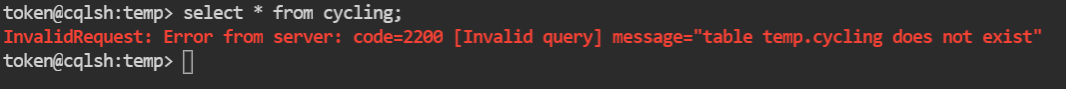

Query 16:Dropping Keyspace from database

In [ ]:
# Require permission to execute this operation; Astra doesnot provide is as on today

q13='drop keyspace temp'
x=session.execute(q13)
print(x)

Query 17: Composite Partition Keys and Filtering 

In [158]:
# Works well with one primary key of two
q14= "select * from mycs123.cycling where category ='GC'"
x=session.execute(q14)
for row in x:
    print(row)

Row(category='GC', points=86, id=UUID('9f3c7870-bccd-11eb-aad6-973e7867c912'), lastname='Arav')
Row(category='GC', points=98, id=UUID('9f3dff10-bccd-11eb-aad6-973e7867c912'), lastname='Zen')


In [180]:
q12a = 'create table temp.cycling( category text, points int, id UUID,lastname text, PRIMARY KEY ((category, points), id) )'
session.execute(q12a)

In [187]:

q4a = """insert into temp.cycling JSON '{
          "category" : "Sprint", 
          "points" : 700, 
          "id" : "829aa84a-4bba-411f-a4fb-38167a987cda",
          "lastname" :"King" }'    
        """
q4b = """insert into temp.cycling JSON '{
          "category" : "GC", 
          "points" : 745, 
          "id" : "829aa84a-4bba-411f-a4fb-38167a987cda",
          "lastname" :"Queen" }'    
        """
q4c = """insert into temp.cycling JSON '{
          "category" : "Sprint", 
          "points" : 787, 
          "id" : "829aa84a-4bba-411f-a4fb-38167a987cda",
          "lastname" :"Ace" }'    
        """
q4d = """insert into temp.cycling JSON '{
          "category" : "400", 
          "points" : 709, 
          "id" : "829aa84a-4bba-411f-a4fb-38167a987cda",
          "lastname" :"Jack" }'    
        """
x=session.execute(q4d)
for row in x:
    print(row)

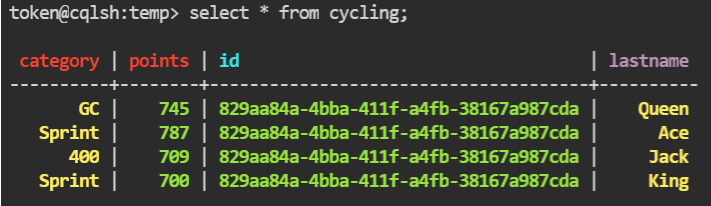

In [188]:
# Filering does not work for single key when composite Partition key used PRIMARY KEY ((category, points), id)
q15="select * from temp.cycling where category = 'GC'"  
x=session.execute(q15)
for row in x:
    print(row)

InvalidRequest: Error from server: code=2200 [Invalid query] message="Cannot execute this query as it might involve data filtering and thus may have unpredictable performance. If you want to execute this query despite the performance unpredictability, use ALLOW FILTERING"

In [195]:
# Composite keys are manadate for filtering

q14= "select * from temp.cycling where category ='Sprint' and points = 787"
x=session.execute(q14)
for row in x:
    print(row)

Row(category='Sprint', points=787, id=UUID('829aa84a-4bba-411f-a4fb-38167a987cda'), lastname='Ace')


Query 18: Indexing for composite keys and filtering

In [200]:
# Single indexing 

q15="create index pnt on temp.cycling (category)"
x=session.execute(q15)
q15a="select * from temp.cycling where category ='Sprint'"
y=session.execute(q15a)
for row in y:
    print(row)

Row(category='Sprint', points=787, id=UUID('829aa84a-4bba-411f-a4fb-38167a987cda'), lastname='Ace')
Row(category='Sprint', points=700, id=UUID('829aa84a-4bba-411f-a4fb-38167a987cda'), lastname='King')


In [ ]:
# Indexing on new table

q12a = 'create table temp.cycle( category text, points int, id UUID,lastname text, PRIMARY KEY ((category, points), id) )'
session.execute(q12a)

In [219]:
q4a = """insert into temp.cycle JSON '{
          "category" : "Sprint", 
          "points" : 700, 
          "id" : "829aa84a-4bba-411f-a4fb-38167a987cda",
          "lastname" :"King" }'    
        """
q4b = """insert into temp.cycle JSON '{
          "category" : "GC", 
          "points" : 745, 
          "id" : "829aa84a-4bba-411f-a4fb-38167a987cda",
          "lastname" :"Queen" }'    
        """
q4c = """insert into temp.cycle JSON '{
          "category" : "Sprint", 
          "points" : 787, 
          "id" : "829aa84a-4bba-411f-a4fb-38167a987cda",
          "lastname" :"Ace" }'    
        """
q4d = """insert into temp.cycle JSON '{
          "category" : "400", 
          "points" : 709, 
          "id" : "829aa84a-4bba-411f-a4fb-38167a987cda",
          "lastname" :"Jack" }'    
        """
x=session.execute(q4d)
for row in x:
    print(row)

In [220]:
# With no indexing for composite keys
q16b="select * from temp.cycle where category ='Queen'"
y=session.execute(q16b)
for row in y:
    print(row)

InvalidRequest: Error from server: code=2200 [Invalid query] message="Cannot execute this query as it might involve data filtering and thus may have unpredictable performance. If you want to execute this query despite the performance unpredictability, use ALLOW FILTERING"

In [221]:
# With no indexing for composite keys
q16b="select * from temp.cycle where points =745"
y=session.execute(q16b)
for row in y:
    print(row)

InvalidRequest: Error from server: code=2200 [Invalid query] message="Cannot execute this query as it might involve data filtering and thus may have unpredictable performance. If you want to execute this query despite the performance unpredictability, use ALLOW FILTERING"

In [226]:
q14= "select * from temp.cycle where category ='Sprint' and points = 787"
x=session.execute(q14)
for row in x:
    print(row)

Row(category='Sprint', points=787, id=UUID('829aa84a-4bba-411f-a4fb-38167a987cda'), lastname='Ace')


In [227]:
#Create index on one key and Select on other key

q16="create index cat_idx on temp.cycle (category)"
x=session.execute(q16)
q15a="select * from temp.cycling where points =787"
y=session.execute(q15a)
for row in y:
    print(row)

InvalidRequest: Error from server: code=2200 [Invalid query] message="Cannot execute this query as it might involve data filtering and thus may have unpredictable performance. If you want to execute this query despite the performance unpredictability, use ALLOW FILTERING"

In [231]:
# Composite Keys with Allow Filtering
q18 = "SELECT * FROM temp.cycle WHERE points = 787 ALLOW FILTERING"
y=session.execute(q18)
for row in y:
    print(row)

Row(category='Sprint', points=787, id=UUID('829aa84a-4bba-411f-a4fb-38167a987cda'), lastname='Ace')


In [232]:
#Create index on one key and Select on other key

q16="create index cat_idx on temp.cycle (category)"
x=session.execute(q16)
q15a="select * from temp.cycling where points =787 allow filtering"
y=session.execute(q15a)
for row in y:
    print(row)

Row(category='Sprint', points=787, id=UUID('829aa84a-4bba-411f-a4fb-38167a987cda'), lastname='Ace')


Query 19: Collection indexing

In [ ]:
q17="create index pnt_cat_idx on temp.cycle ( points );"
session.execute(q17)
q18="select * from temp.cycle where points contains 709 "
x=session.execute(q18)
for row in x:
    print(row)

Query 20: Aggregate

In [236]:
q18="select min(points) from temp.cycle"
x=session.execute(q18)
for row in x:
    print(row)

Row(system_min_points=700)


In [237]:
q18="select max(points) from temp.cycle"
x=session.execute(q18)
for row in x:
    print(row)

Row(system_max_points=787)


In [238]:
q18="select sum(points) from temp.cycle"
x=session.execute(q18)
for row in x:
    print(row)

Row(system_sum_points=2941)


In [239]:
q18="select avg(points) from temp.cycle"
x=session.execute(q18)
for row in x:
    print(row)

Row(system_avg_points=735)
